In [1]:
#!/usr/bin/python
import spidev
#import RPi.GPIO as GPIO
import time

import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import glob, os
from scipy import signal as ssignal
%matplotlib inline


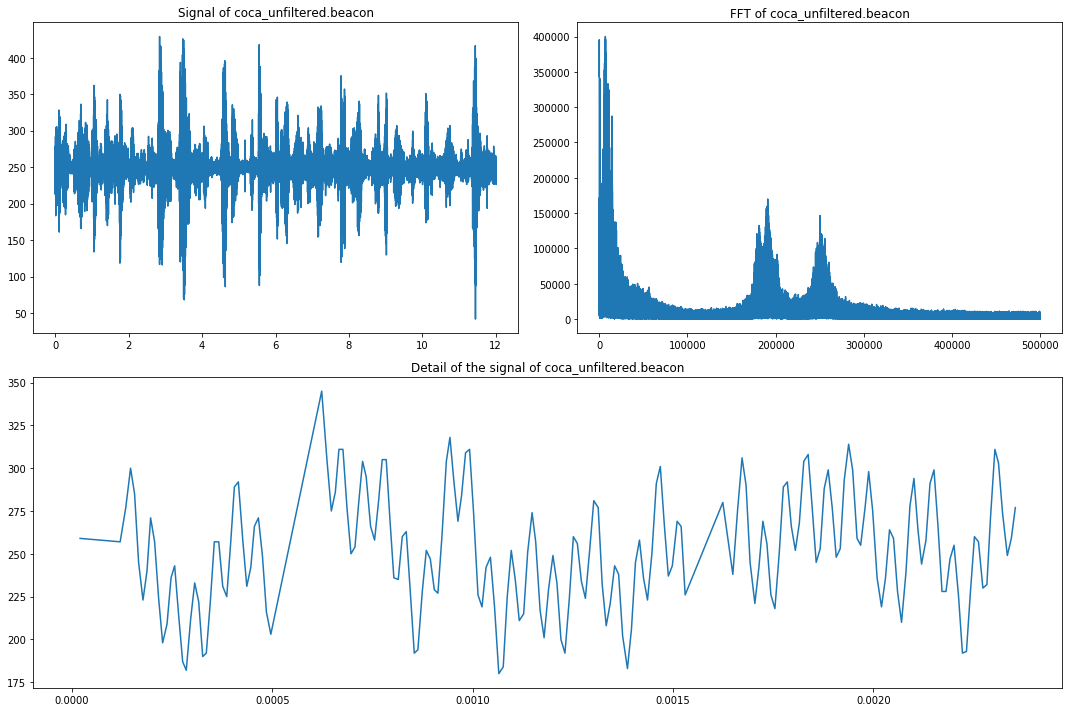

In [2]:
os.chdir("./")
for tmpfile in glob.glob("coca*un*.beacon"):
    
    FILE = tmpfile
    with open(FILE) as f:
        content = f.readlines()
    # you may also want to remove whitespace characters like `\n` at the end of each line
    content = [x.strip() for x in content] 


    A = []
    t = []
    for item in content[:-2]:
            resp = item.split(" ")
            A.append( 256*(int(resp[0])/8) + int(resp[1]) )
            t.append(float(resp[2])) 
  
    fig = plt.figure(figsize=(15, 10))

    ax1 = plt.subplot2grid((2, 2), (0, 0))
    ax2 = plt.subplot2grid((2, 2), (0, 1))
    ax3 = plt.subplot2grid((2, 2), (1,0), colspan=2)


    ax1.plot(ssignal.decimate(t,10)[1:],ssignal.decimate(A,10)[1:])
    ax1.set_title("Signal of "+tmpfile)
    ax3.plot(t[0:len(A)/5000],A[0:len(A)/5000])
    ax3.set_title("Detail of the signal of "+tmpfile)
    
    F = np.abs(np.fft.fft(A))
    ax2.plot(F[100:len(A)/2-1])
    ax2.set_title("FFT of "+tmpfile)

    plt.tight_layout()
    
    plt.savefig(tmpfile+"details.jpg")
    plt.show()

In [18]:
distT = [ int((t[i+1]-t[i])*1.0e06) for i in range(len(t)-1)      ]
tau = np.mean(distT[1:])
print(tau)

11.6238082476


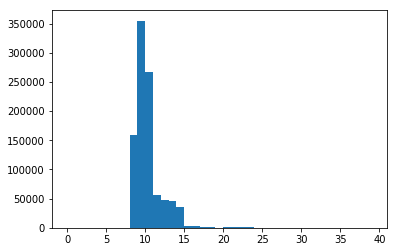

In [16]:
plt.hist(distT[1:],range(40))
plt.show()

# Mapping US signals from sounds recorded

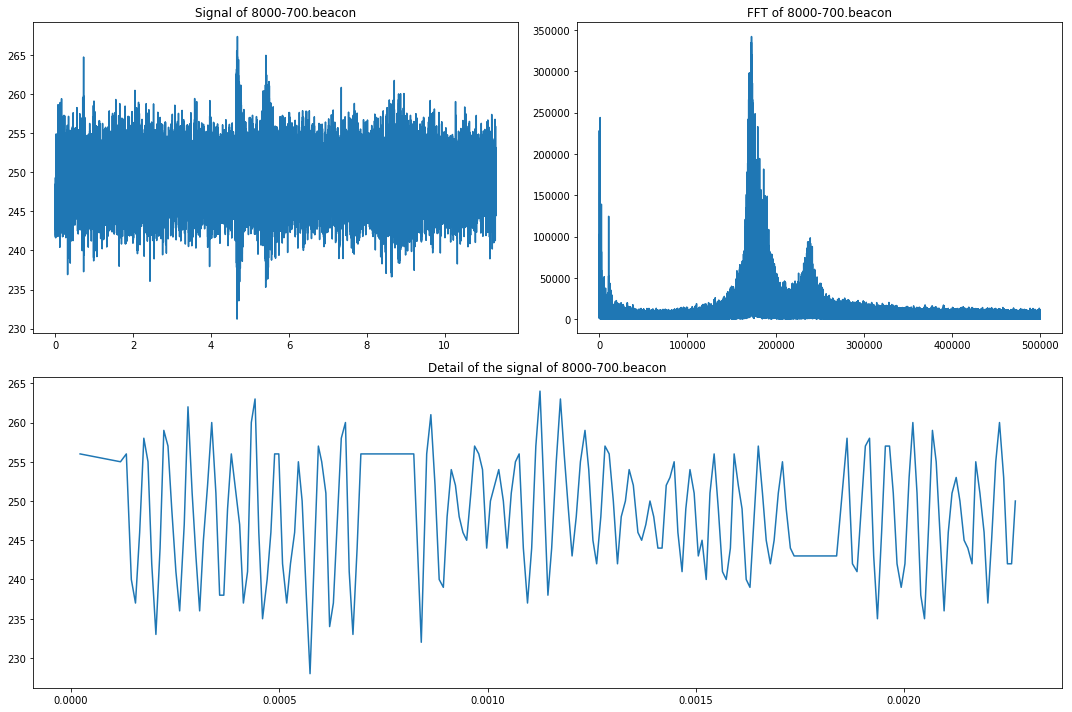

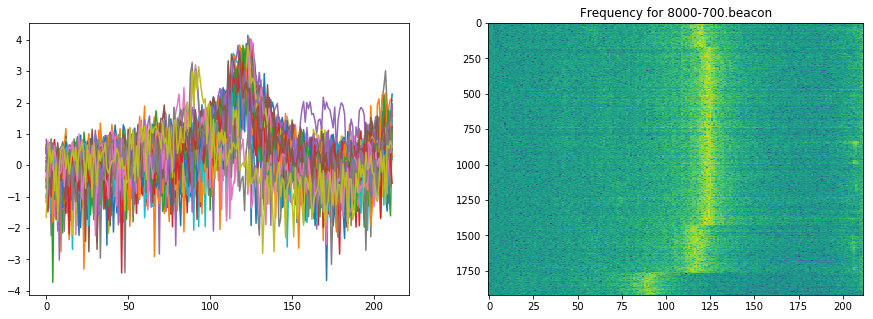

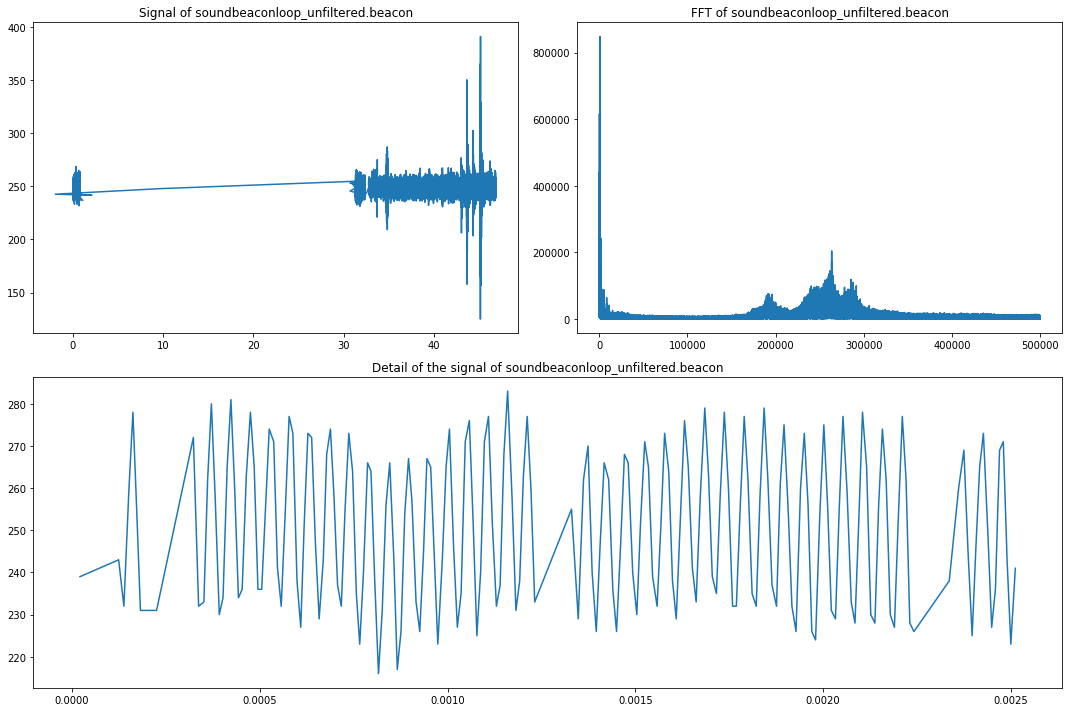

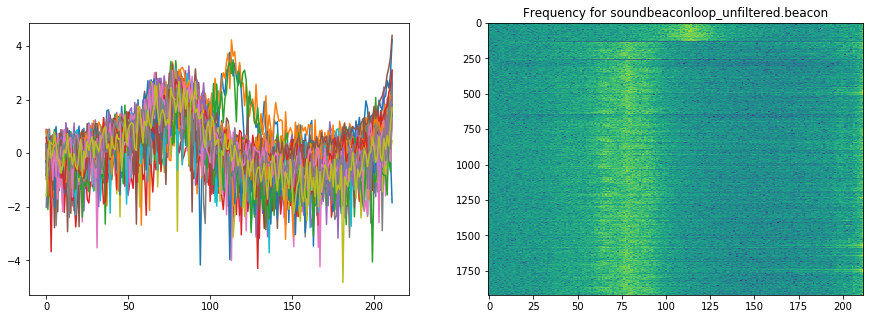

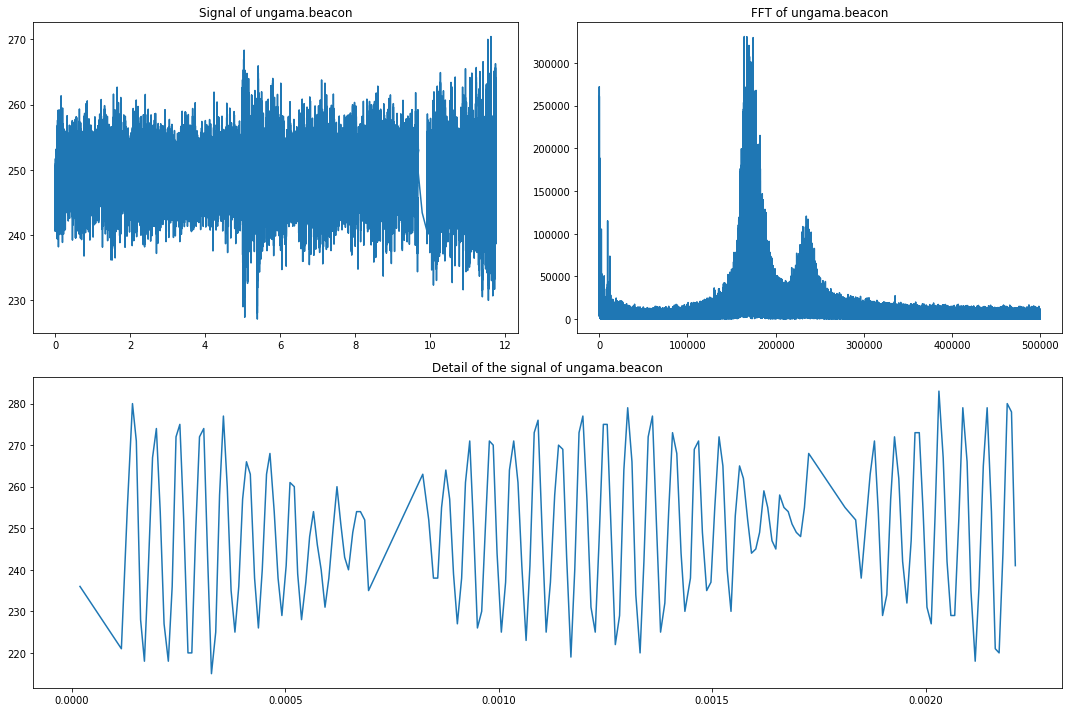

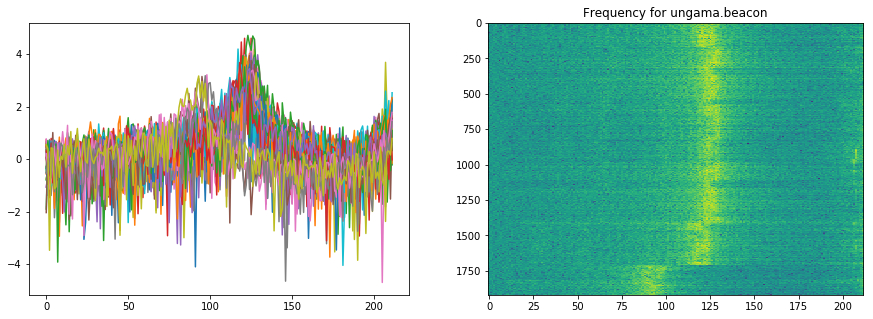

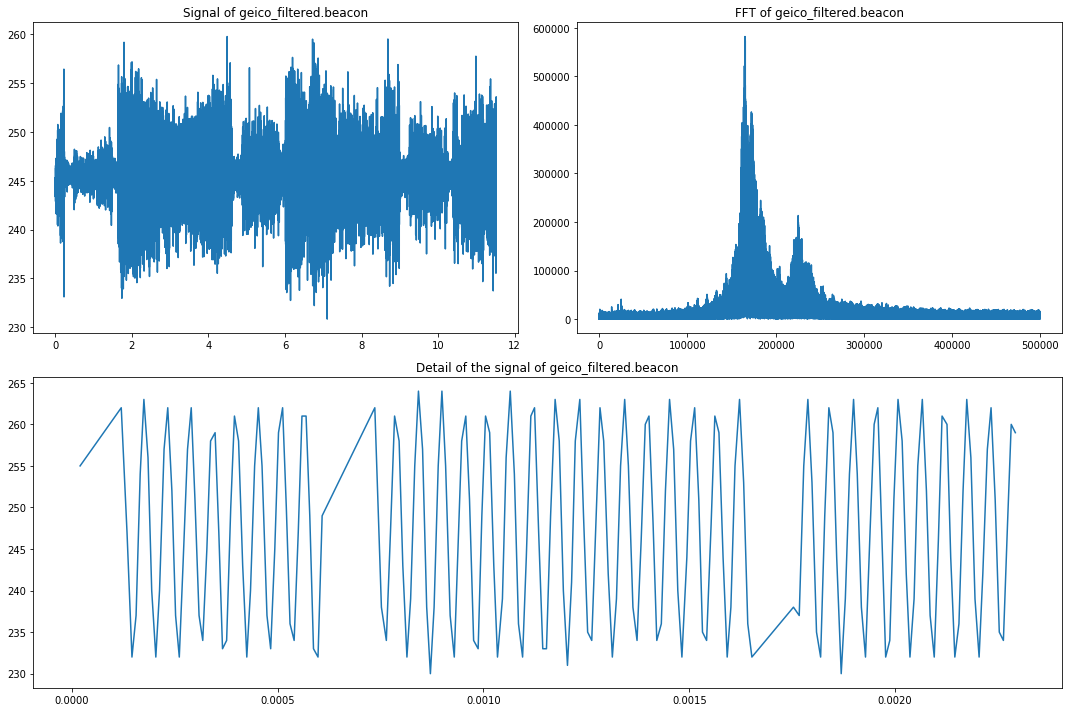

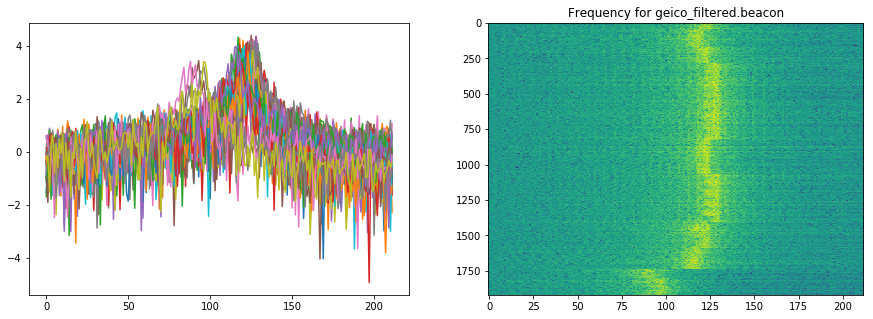

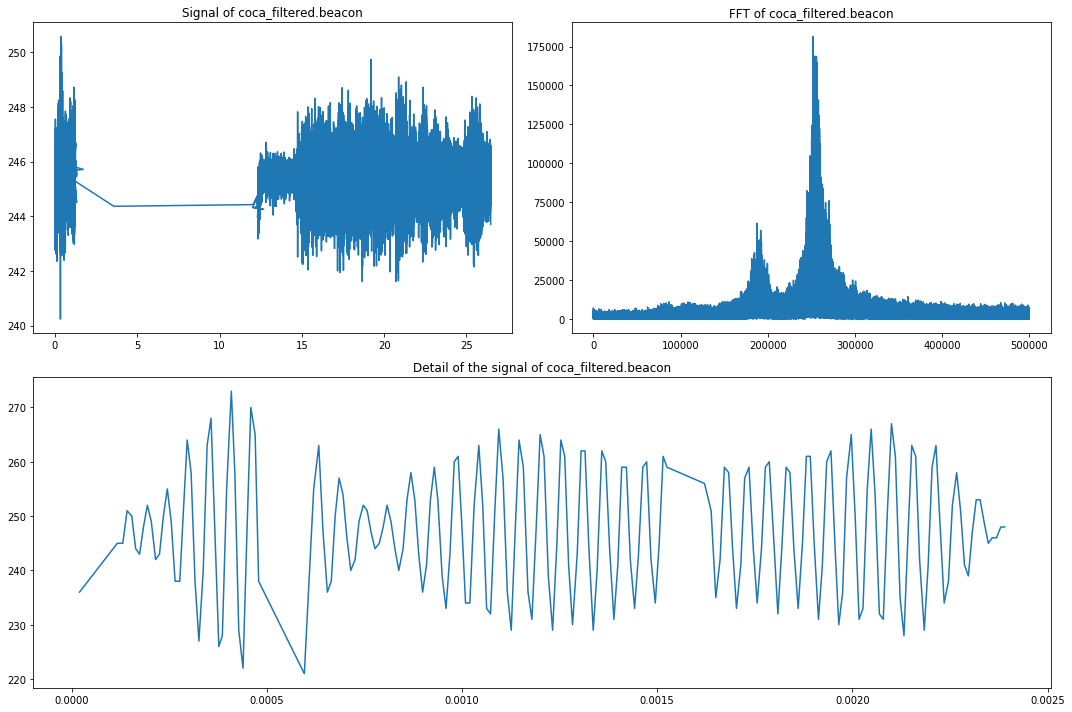

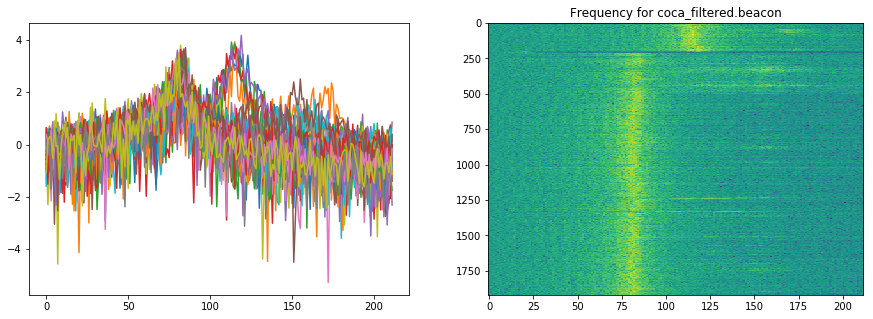

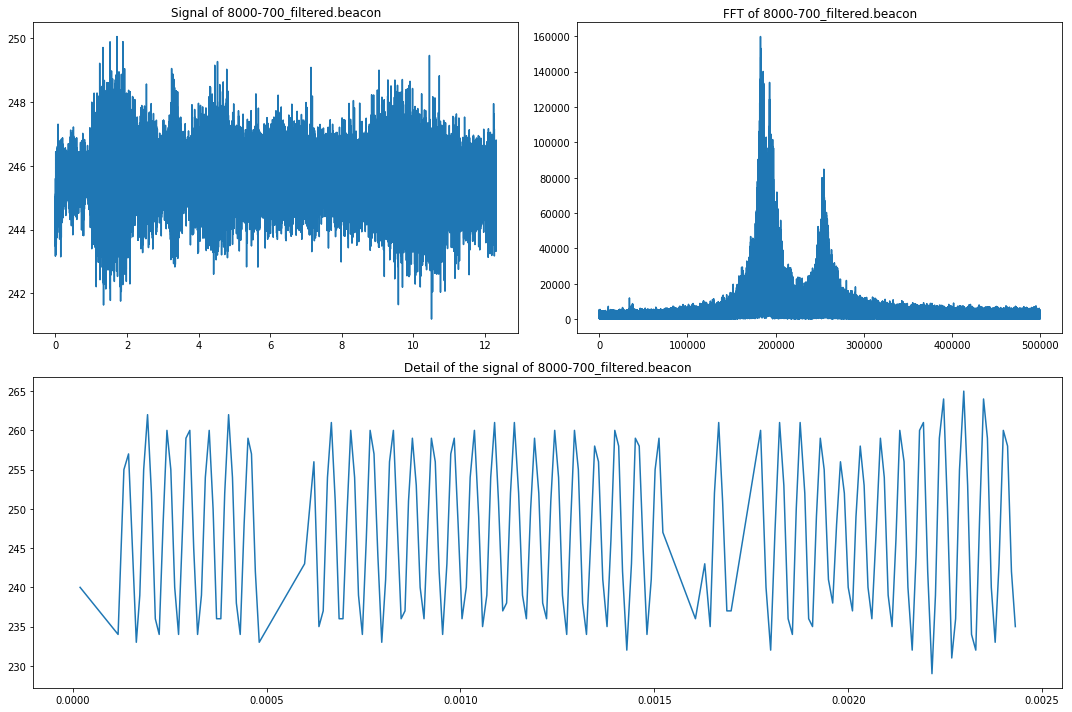

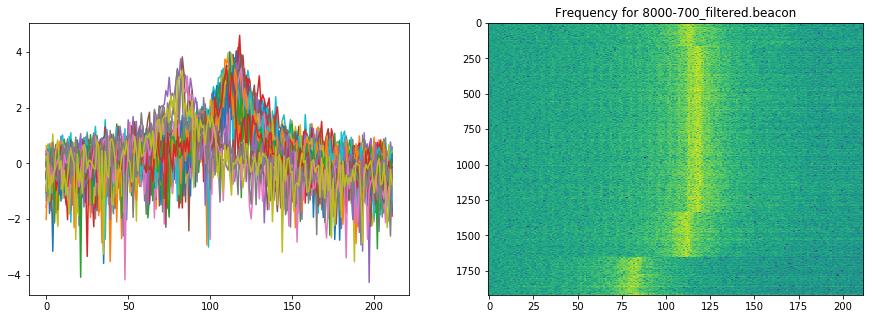

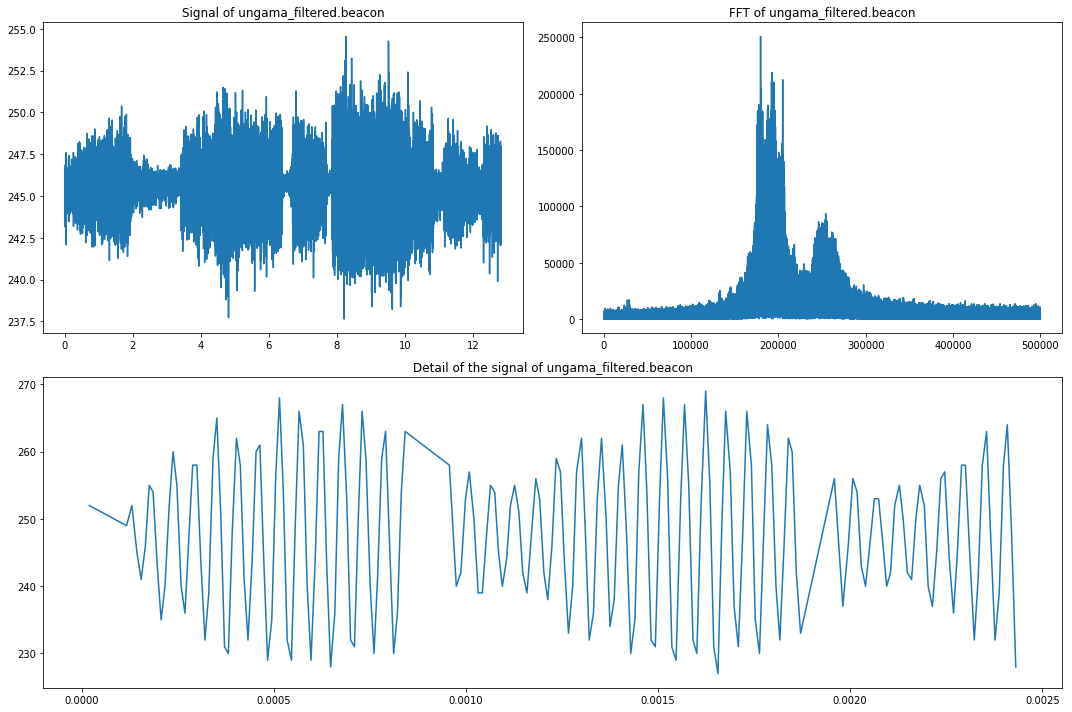

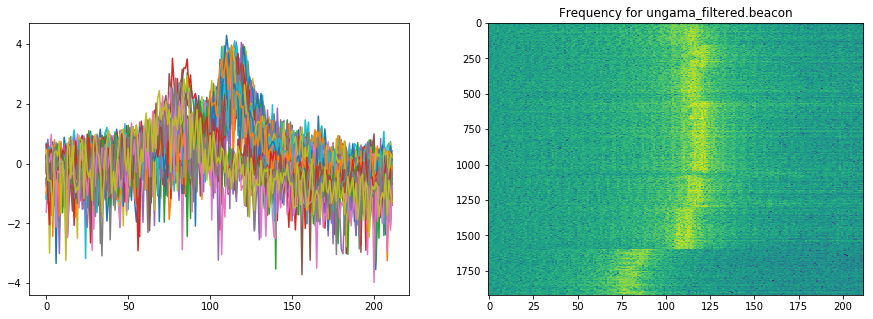

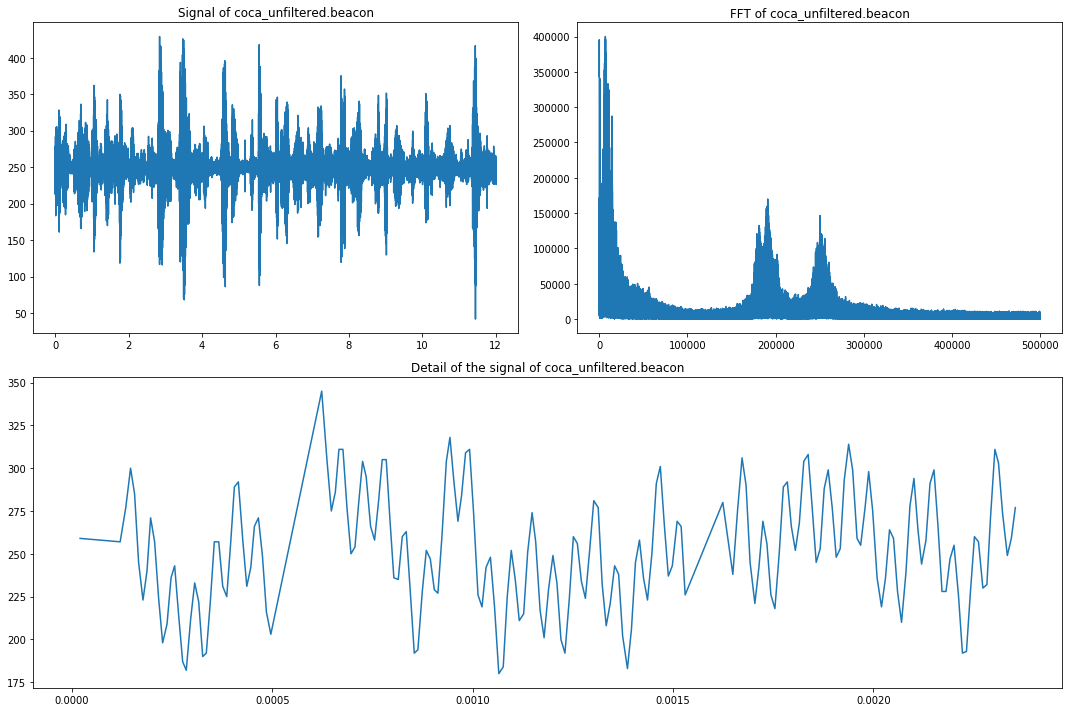

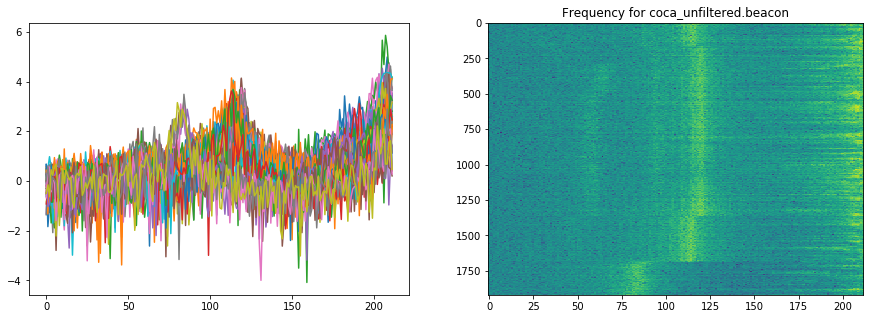

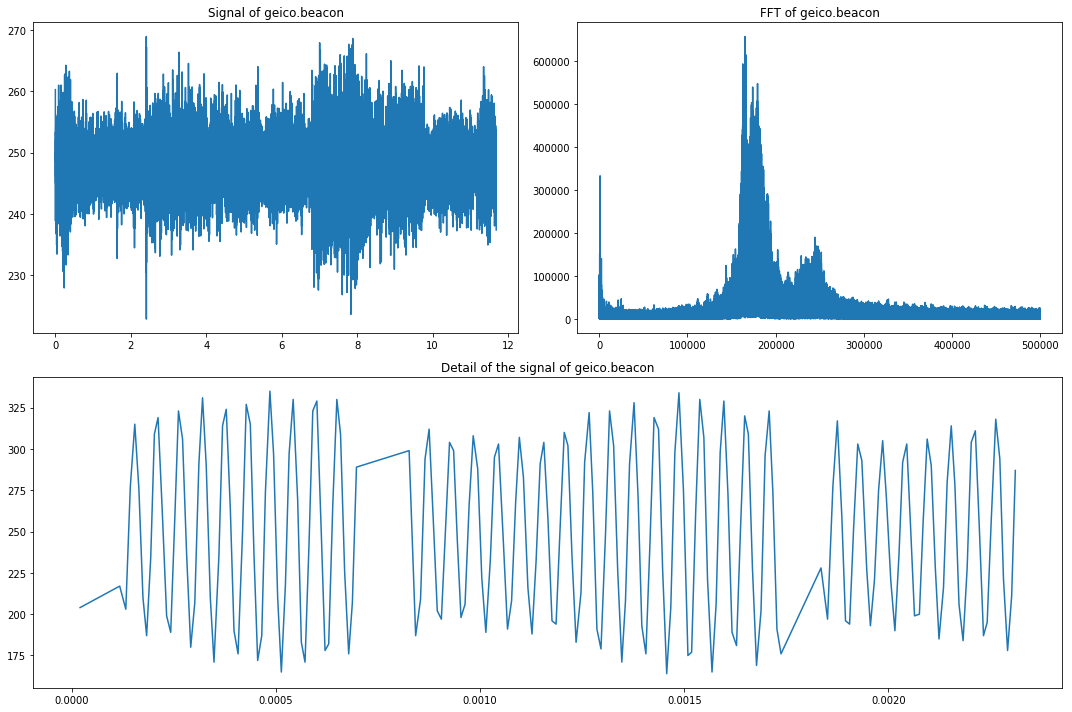

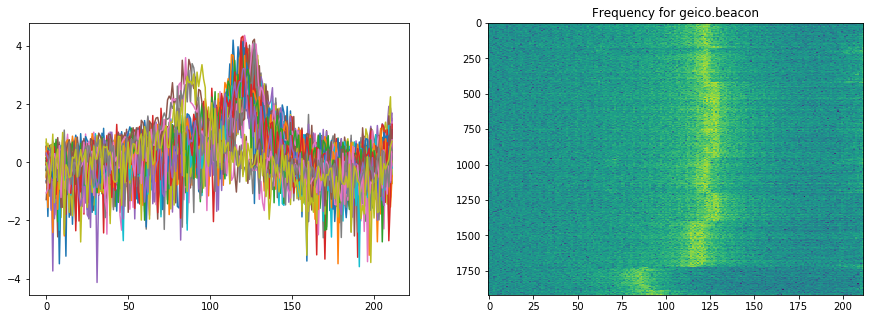

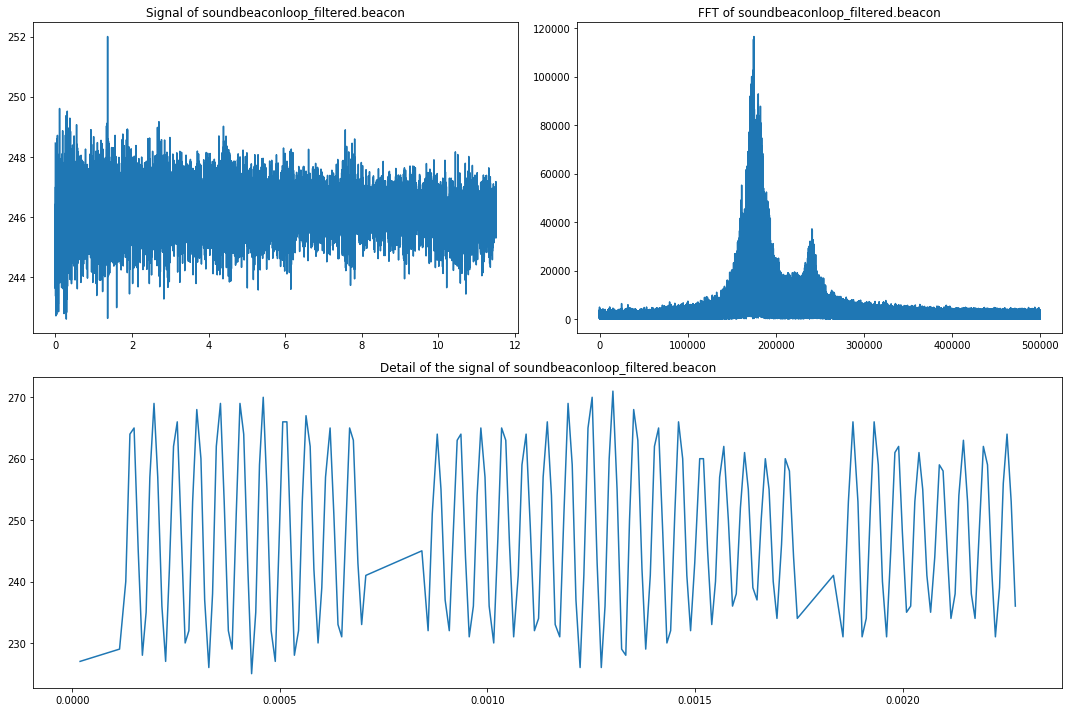

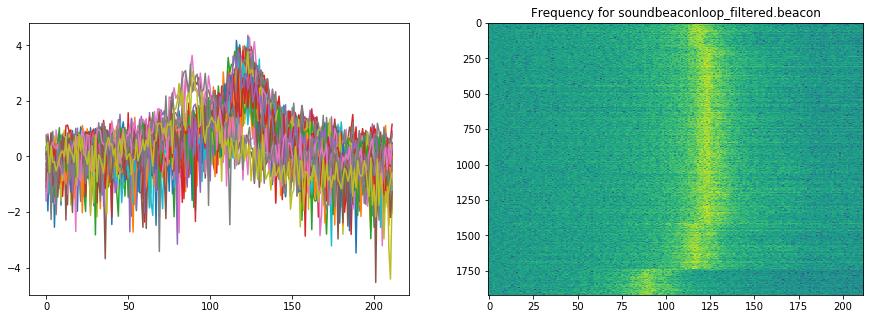

In [131]:
os.chdir("./")
for tmpfile in glob.glob("*.beacon"):
    
    FILE = tmpfile
    with open(FILE) as f:
        content = f.readlines()
    # you may also want to remove whitespace characters like `\n` at the end of each line
    content = [x.strip() for x in content] 


    A = []
    t = []
    for item in content[:-2]:
            resp = item.split(" ")
            A.append( 256*(int(resp[0])/8) + int(resp[1]) )
            t.append(float(resp[2])) 
  
    fig = plt.figure(figsize=(15, 10))

    ax1 = plt.subplot2grid((2, 2), (0, 0))
    ax2 = plt.subplot2grid((2, 2), (0, 1))
    ax3 = plt.subplot2grid((2, 2), (1,0), colspan=2)


    ax1.plot(ssignal.decimate(t,10)[1:],ssignal.decimate(A,10)[1:])
    ax1.set_title("Signal of "+tmpfile)
    ax3.plot(t[0:len(A)/5000],A[0:len(A)/5000])
    ax3.set_title("Detail of the signal of "+tmpfile)
    
    F = np.abs(np.fft.fft(A))
    ax2.plot(F[100:len(A)/2-1])
    ax2.set_title("FFT of "+tmpfile)

    plt.tight_layout()
    
    plt.savefig(tmpfile+"details.jpg")
    plt.show()
    
    f, axarr = plt.subplots(1,2,figsize=(15,5)) 
    plt.title("Frequency for "+tmpfile)
    FFT = []
    length = 1024/2
    for k in range(4*480):
        offset = (k+1)*length-1
        B = np.fft.fft(A[offset:offset+length])
        SIG = np.abs(B[300:650])
        SIG = np.log(SIG/np.average(SIG[0:10]))
        FFT.append(SIG)
        if not (k%50):

            axarr[0].plot(SIG)
    #print (offset+length,len(A))
    axarr[1].imshow(FFT,aspect=0.08)
    plt.savefig(tmpfile+"spectrum.jpg")
    plt.show()